In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
import pandas as pd
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
X = df.drop(['target'], axis='columns')
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
tree_count = 20
model = RandomForestClassifier(n_estimators=tree_count)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [24]:
model.score(X_test, y_test)

0.95

In [25]:
y_predicted = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 34,  0,  0,  0,  1,  0,  1],
       [ 1,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 38,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  1, 34,  1],
       [ 0,  2,  0,  2,  0,  0,  0,  0,  1, 31]], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

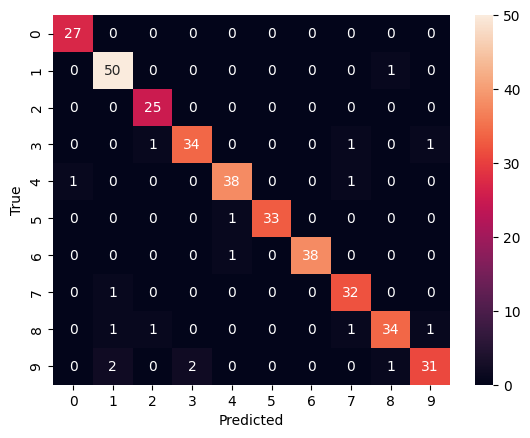

In [30]:
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')